In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
#from hapi import *
#db_begin('data')

In [31]:
import csv
import subprocess

In [3]:
print_iso_id()

The dictionary "ISO_ID" contains information on "global" IDs of isotopologues in HITRAN

   id            M    I                    iso_name       abundance       mass        mol_name
    1     :      1    1                     H2(16O)    0.9973173000  18.010560             H2O
    2     :      1    2                     H2(18O)    0.0019998270  20.014810             H2O
    3     :      1    3                     H2(17O)    0.0003718841  19.014780             H2O
    4     :      1    4                     HD(16O)    0.0003106928  19.016740             H2O
    5     :      1    5                     HD(18O)    0.0000006230  21.020980             H2O
    6     :      1    6                     HD(17O)    0.0000001159  20.020960             H2O
  129     :      1    7                     D2(16O)    0.0000000242  20.022920             H2O
    7     :      2    1                 (12C)(16O)2    0.9842043000  43.989830             CO2
    8     :      2    2                 (13C)(16O)2    0

## Prepare linelist data

### Fetching from HITRAN

In [4]:
parlist = ['trans_id',
 'par_line',
 'molec_id',
 'local_iso_id',
 'nu',
 'sw',
 'a',
 'elower',
 'gamma_air',
 'delta_air',
 'gamma_self',
 'n_air',
 'n_self',
 'gp',
 'gpp',
 'statep',
 'statepp',
 'deltap_air',
 'delta_self',
 'deltap_self',
 'gamma_H2',
 'delta_H2',
 'deltap_H2',
 'n_H2',
 'gamma_CO2',
 'delta_CO2',
 'n_CO2',
 'gamma_He',
 'delta_He',
 'n_He',
 'gamma_H2O',
 'n_H2O',
 'y_air',
 'y_self',
 'gamma_SDV_0_air_296',
 'gamma_SDV_2_air_296',
 'delta_SDV_0_air_296',
 'deltap_SDV_air_296',
 'SD_air',
 'gamma_SDV_0_self_296',
 'gamma_SDV_2_self_296',
 'delta_SDV_0_self_296',
 'deltap_SDV_self_296',
 'SD_self',
 'Y_SDV_air_296',
 'Y_SDV_self_296',
 'beta_g_air',
 'beta_g_self',
 'gamma_HT_0_self_296',
 'n_HT_self_296',
 'gamma_HT_2_self_296',
 'delta_HT_0_self_296',
 'deltap_HT_self_296',
 'delta_HT_2_self_296',
 'nu_HT_self',
 'kappa_HT_self',
 'eta_HT_self',
 'Y_HT_self_296',
 'gamma_HT_0_air_296',
 'n_HT_air_296',
 'gamma_HT_2_air_296',
 'delta_HT_0_air_296',
 'deltap_HT_air_296',
 'delta_HT_2_air_296',
 'nu_HT_air',
 'kappa_HT_air',
 'eta_HT_air',
 'Y_HT_air_296', 'global_upper_quanta', 'global_lower_quanta', 'local_upper_quanta', 'local_lower_quanta']

In [5]:
fetch_by_ids('CO2',[7, 8, 9, 10],2000,2150, Parameters=parlist)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  6

### Add HT parameters not in HITRAN

#### parameter lists

In [6]:
sdvoigt_parlist =  ['gamma_SDV_0_air_296',
 'gamma_SDV_2_air_296',
 'delta_SDV_0_air_296',
 'gamma_SDV_0_self_296',
 'gamma_SDV_2_self_296',
 'delta_SDV_0_self_296',
 'Y_SDV_air_296',
 'Y_SDV_self_296']

htparlist = ['gamma_HT_0_air_296',
'gamma_HT_2_air_296', 
'delta_HT_0_air_296',  
'gamma_HT_0_self_296', 
'gamma_HT_2_self_296',
'delta_HT_0_self_296',             
'Y_HT_air_296',
'Y_HT_self_296']

htparlist_zeros = [
 'n_HT_self_296', #set to 0 (temp dep doesn't matter)
 'n_HT_air_296', #set to 0 
    
 'deltap_HT_self_296', #set to 0
 'delta_HT_2_self_296', #set to 0?

 'kappa_HT_self', #set to 0(temp dep doesn't matter)
 'eta_HT_self', #set to 0(Reduce to SD Rautian)

 'deltap_HT_air_296',  #set to 0  
 'delta_HT_2_air_296', #set to 0?
 
 'kappa_HT_air', #set to 0(temp dep doesn't matter)
 'eta_HT_air', #set to 0
]

htdlist = [
'nu_HT_self', #set to dicke param from labfit
'nu_HT_air' #set to dicke param from labfit
]

htpar_all = ['gamma_HT_0_air_296',
 'gamma_HT_2_air_296',
 'delta_HT_0_air_296',
 'gamma_HT_0_self_296',
 'gamma_HT_2_self_296',
 'delta_HT_0_self_296',
 'Y_HT_air_296',
 'Y_HT_self_296',
 'nu_HT_self',
 'nu_HT_air',
 'n_HT_self_296',
 'n_HT_air_296',
 'deltap_HT_self_296',
 'delta_HT_2_self_296',
 'kappa_HT_self',
 'eta_HT_self',
 'deltap_HT_air_296',
 'delta_HT_2_air_296',
 'kappa_HT_air',
 'eta_HT_air']

#### modify database

In [2]:
edf = pd.read_csv('extra.csv') #contains dicke param data from Ritika's fit

In [3]:
edf

,trans_id,nu,nuVC_air
0,10642347,2000.105187,0.0
1,10642348,2000.114112,0.0
2,10434534,2000.147147,0.0
3,10642349,2000.156770,0.0
4,10642350,2000.159105,0.0
...,...,...,...
18048,10659104,2149.933762,0.0
18049,10659105,2149.945661,0.0
18050,10659106,2149.955075,0.0
18051,10659107,2149.966756,0.0


In [8]:
def add_htparam(pardf):
    #set data from sdv parameters
    for i in range(len(sdvoigt_parlist)):
        pardf[htparlist[i]] = LOCAL_TABLE_CACHE['CO2']['data'][sdvoigt_parlist[i]]
        
    #set nu_HT_self, nu_HT_air to dicke param from labfit
    pardf['nu_HT_self'] = pardf['nuVC_air']
    pardf['nu_HT_air'] = pardf['nuVC_air']

    #set rest of params to zero
    for par in htparlist_zeros:
        pardf[par] = np.zeros(len(pardf))

    pardf = pardf.drop('nuVC_air', axis=1)

    for par in htpar_all:
        LOCAL_TABLE_CACHE['CO2']['data'][par].mask =  np.zeros(len(pardf), dtype = bool) #remove mask
        lst = np.array(pardf[par])
        LOCAL_TABLE_CACHE['CO2']['data'][par].data[1:] = lst[1:]
        LOCAL_TABLE_CACHE['CO2']['data'][par].data[0] = lst[0]
        
    db_commit() #commit changes to local database

In [9]:
add_htparam(edf)

sampletab
CO2


In [10]:
#pardf.to_csv('ht_param.csv')    
pdf = pd.read_csv('ht_param.csv')
pdf

,Unnamed: 0,trans_id,nu,gamma_HT_0_air_296,gamma_HT_2_air_296,delta_HT_0_air_296,gamma_HT_0_self_296,gamma_HT_2_self_296,delta_HT_0_self_296,Y_HT_air_296,...,n_HT_self_296,n_HT_air_296,deltap_HT_self_296,delta_HT_2_self_296,kappa_HT_self,eta_HT_self,deltap_HT_air_296,delta_HT_2_air_296,kappa_HT_air,eta_HT_air
0,0,10642347,2000.105187,0.0608,0.004449,-0.002545,0.0705,0.005751,-0.003001,-0.000112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,10642348,2000.114112,0.0675,0.006076,-0.002264,0.0775,0.009322,-0.002336,0.057080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10434534,2000.147147,0.0655,0.005445,-0.002322,0.0733,0.007677,-0.002838,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,10642349,2000.156770,0.0715,0.007095,-0.002130,0.0952,0.012080,-0.001863,0.003020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,10642350,2000.159105,0.0646,0.005236,-0.002366,0.0733,0.007217,-0.002958,0.002657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,18048,10659104,2149.933762,0.0693,0.006680,-0.002066,0.0884,0.011065,-0.002051,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18049,18049,10659105,2149.945661,0.0608,0.004449,-0.002545,0.0705,0.005751,-0.003001,0.001420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18050,18050,10659106,2149.955075,0.0593,0.004167,-0.004010,0.0686,0.005299,-0.004439,0.006346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18051,18051,10659107,2149.966756,0.0849,0.007586,-0.000485,0.1156,0.015337,-0.000881,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Simulate Spectrum

### Sample Conditions

In [24]:
sdf = pd.read_csv('sample_hapi.csv') 
#sdf.astype('float64').dtypes

In [25]:
sdf.set_index('Run')

,Total calibrated pressure (mbar),Mixing ratio,Spectral resolution (cm-1),Point spacing,Pathlength(cm),Pathlength(m),Pressure(atm),Pressure(torr),FOV,MOPD,file,nu_min,nu_max,ap_cpde,hitran gas code
Run,,,,,,,,,,,,,,,
1,20.54,1.000000,0.003,0.0015,165.80,1.6580,0.020271,15.406273,0.000008,300,hapi_snr2000_r1,2000,2150,0,2
2,50.10,1.000000,0.006,0.0030,165.80,1.6580,0.049445,37.578106,0.000008,150,hapi_snr2000_r2,2000,2150,0,2
3,101.24,1.000000,0.006,0.0030,85.03,0.8503,0.099916,75.936277,0.000008,150,hapi_snr2000_r3,2000,2150,0,2
4,214.73,1.000000,0.006,0.0030,85.03,0.8503,0.211922,161.060813,0.000008,150,hapi_snr2000_r4,2000,2150,0,2
5,300.03,1.000000,0.006,0.0030,85.03,0.8503,0.296107,225.041102,0.000008,150,hapi_snr2000_r5,2000,2150,0,2
6,11.79,0.143551,0.003,0.0015,1934.30,19.3430,0.011636,8.843231,0.000008,300,hapi_snr2000_r6,2000,2150,0,2
7,47.33,0.031886,0.006,0.0030,1934.30,19.3430,0.046711,35.500434,0.000008,150,hapi_snr2000_r7,2000,2150,0,2
8,75.19,0.049121,0.006,0.0030,1934.30,19.3430,0.074207,56.397162,0.000008,150,hapi_snr2000_r8,2000,2150,0,2
9,112.05,0.042584,0.006,0.0030,1934.30,19.3430,0.110585,84.044447,0.000008,150,hapi_snr2000_r9,2000,2150,0,2


### Calculate Spectrum

In [17]:
#co2 isotopologue abundance
iso7= 0.9842043000
iso8= 0.0110573600
iso9= 0.0039470660
iso10=0.0007339890

In [18]:
#instrumental function, this is the one provided by hapi, but slightly modified with MOPD = 0.9/res
def MICHELSON(x,g):
    g1 = g/0.9 
    y = zeros(len(x))
    index_zero = x==0
    index_nonzero = ~index_zero
    dk_ = 2*pi/g1
    x_ = dk_*x[index_nonzero]
    #y[index_zero] = 1 (??)
    y[index_zero] = 2/g1
    y[index_nonzero] = 2/g1*sin(x_)/x_
    return y

In [19]:
#took from MATS, add random noise drawn from gaussian distribution
def add_noise(arr, snr):
    arr_noisy = arr + np.max(arr)*np.random.normal(loc = 0, scale =1, size = len(arr))*1/snr 
    return arr_noisy

#### SDVoigt

In [134]:
def simulate_sdvoigt(sdf):  
    for index, row in sdf.iterrows():
        run = index + 1
        #calculate absorption coefficient with speed dependent voigt profile
        nu,coef = absorptionCoefficient_SDVoigt(SourceTables='CO2', IntensityThreshold = 1e-30,
                                                Components = [(2, 1, row['Mixing ratio of CO2']*iso7), (2, 2, row['Mixing ratio of CO2']*iso8),
                                                              (2, 3, row['Mixing ratio of CO2']*iso9), (2, 4, row['Mixing ratio of CO2']*iso10)],
                                                HITRAN_units=False, File = f'run{run}', WavenumberStep = row['Spectral resolution (cm-1)'],
                                                WavenumberRange = [2000, 2150], Environment = {'p':row['Pressure(atm)'],'T':296.0})
        #calculate absorbance and transmittance                                       
        nu,absorp = absorptionSpectrum(nu,coef, Environment = {'l': row['Pathlength (cm)'] })
        nu,trans = transmittanceSpectrum(nu,coef, Environment = {'l': row['Pathlength (cm)'] })
        
        #apply instrumental function(michelson)
        nu_,ab_slit,_,_,_ = convolveSpectrum(nu,absorp, SlitFunction=MICHELSON, Resolution= row['Spectral resolution (cm-1)']+0.00000000001) #need to make the res slightly larger for convolution to work
        nu_,tran_slit,_,_,_ = convolveSpectrum(nu,trans, SlitFunction=MICHELSON, Resolution= row['Spectral resolution (cm-1)']+0.00000000001)
        
        #add noise to spectrum 
        snr = 1000
        ab_noisy = add_noise(ab_slit, snr)
        tran_noisy = add_noise(tran_slit, snr)

        #save all spec data 
        df = pd.DataFrame({r'Wavenumber ($cm^{-1}$)':nu, 'Absorption Coefficient': coef, 'Absorbance': absorp, 'Transmittance': trans})
        df['nu_ins'] = np.pad(nu_, (0, len(nu) - len(nu_)), constant_values=np.nan)
        df['absorp_ins'] = np.pad(ab_slit, (0, len(absorp) - len(ab_slit)), constant_values=np.nan)
        df['tran_ins'] = np.pad(tran_slit, (0, len(trans) - len(tran_slit)), constant_values=np.nan)
        df['absorp_noisy'] = np.pad(ab_noisy, (0, len(absorp) - len(ab_noisy)), constant_values=np.nan)
        df['tran_noisy'] = np.pad(tran_noisy, (0, len(trans) - len(tran_noisy)), constant_values=np.nan)
        
        df.to_csv(f'r{run}.csv')     

#### Hartmann-Tran

In [33]:
'''
@params
sdf: sample condition dataframe
'''
def simulate_ht(sdf, snr):  
    for index, row in sdf.iterrows():
        run = index + 1
        #calculate absorption coefficient with hartmann tran profile
        nu,coef = absorptionCoefficient_HT(SourceTables='CO2', IntensityThreshold = 1e-30,
                                                Components = [(2, 1, row['Mixing ratio']*iso7), (2, 2, row['Mixing ratio']*iso8),
                                                              (2, 3, row['Mixing ratio']*iso9), (2, 4, row['Mixing ratio']*iso10)],
                                                HITRAN_units=False, File = f'hapi_snr{snr}_r{run}', WavenumberStep = row['Point spacing'],
                                                WavenumberRange = [2000, 2150], Environment = {'p':row['Pressure(atm)'],'T':296.0})
        #calculate absorbance and transmittance                                       
        nu,absorp = absorptionSpectrum(nu,coef, Environment = {'l': row['Pathlength(cm)'] })
        nu,trans = transmittanceSpectrum(nu,coef, Environment = {'l': row['Pathlength(cm)'] })
        
        #apply instrumental function(michelson)
        #nu_,ab_slit,_,_,_ = convolveSpectrum(nu,absorp, SlitFunction=MICHELSON, Resolution= row['Spectral resolution (cm-1)']+0.00000000001) #need to make the res slightly larger for convolution to work
        #nu_,tran_slit,_,_,_ = convolveSpectrum(nu,trans, SlitFunction=MICHELSON, Resolution= row['Spectral resolution (cm-1)']+0.00000000001)
        
        #add noise to spectrum 
        ab_noisy = add_noise(absorp, snr)
        tran_noisy = add_noise(trans, snr)

        #save all spec data 
        df = pd.DataFrame({r'Wavenumber ($cm^{-1}$)':nu, 'Absorption Coefficient': coef, 'Absorbance': absorp, 'Transmittance': trans, 'absorp_noisy':ab_noisy, 'tran_noisy': tran_noisy})
        #df['nu_ins'] = np.pad(nu_, (0, len(nu) - len(nu_)), constant_values=np.nan)
        #df['absorp_ins'] = np.pad(ab_slit, (0, len(absorp) - len(ab_slit)), constant_values=np.nan)
        #df['tran_ins'] = np.pad(tran_slit, (0, len(trans) - len(tran_slit)), constant_values=np.nan)
        #df['absorp_noisy'] = np.pad(ab_noisy, (0, len(absorp) - len(ab_noisy)), constant_values=np.nan)
        #df['tran_noisy'] = np.pad(tran_noisy, (0, len(trans) - len(tran_noisy)), constant_values=np.nan)
        
        df.to_csv(f'hapi_snr{snr}_r{run}.csv')

In [38]:
simulate_ht(sdf, 2000)

{'air': 1.0}
17.342376 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
20.950816 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
19.444117 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
22.707591 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
24.267681 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
13.894443 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
13.486368 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
14.776289 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
14.461867 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
17.249352 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
14.690703 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
15.162882 seconds elapsed for abscoef; nlines = 18053
{'air': 1.0}
14.692999 seconds elapsed for abscoef; nlines = 18053


### Plotting

In [27]:
'''
@params
run_num: refer to sample conditions table
yaxis: 'Absorbance'(default)/'Transmittance'/'Absorption Coefficient'/'Transmittance_noisy'(for labfit result only)
       'absorp_ins'/'tran_ins'/'absorp_noisy'/'tran_noisy'
nu_min, nu_max: wavenumber range to plot
color: 'b'(default)
data: 'hapi'/'labfit'
'''
def plot_spec(run_num, yaxis = 'Absorbance', nu_min = 2000, nu_max = 2150, color = 'b', data = 'hapi'): 
    if data == 'hapi':
        data_list = spec_data
    elif data == 'labfit':
        data_list = labfit
        
    df = data_list[run_num-1]
    pressure = sdf.loc[run_num - 1, 'Total calibrated pressure (mbar)']
    if yaxis == 'Absorption Coefficient' or 'Absorbance' or 'Transmittance' or 'Transmittance_noisy':
        filter_df = df[(df[r'Wavenumber ($cm^{-1}$)'] >= nu_min) & (df[r'Wavenumber ($cm^{-1}$)'] <= nu_max)]
        plt.plot(filter_df[r'Wavenumber ($cm^{-1}$)'], filter_df[yaxis], label= f'Run: {run_num}, Pressure: {pressure}(mbar), Temperature: 296 (K), {data}', color = color , linewidth = 0.5)
    else:
        filter_df = df[(df['nu_ins'] >= nu_min) & (df['nu_ins'] <= nu_max)]
        plt.plot(filter_df['nu_ins'], filter_df[yaxis], label= f'Run: {run_num}, Pressure: {pressure}(mbar), Temperature: 296 (K), {data}', color = color , linewidth = 0.5)
        
    plt.xlabel(r'Wavenumber ($cm^{-1}$)')
    plt.ylabel(yaxis)
    plt.legend()

In [35]:
df = pd.read_csv('hapi_snr1000_r1.csv')

### Load Spec Data

In [4]:
def read_spec(num_spec, snr):
    dfl = []
    for i in range(num_spec):
        df = pd.read_csv(f'hapi_snr{snr}_r{i+1}.csv')
        dfl.append(df)
    return dfl

In [5]:
dfl = read_spec(13, 2000)

### save to .asc

In [16]:
def save_asc(labfit, snr):
    for i in range(len(labfit)):
        numlen = len(labfit[i])
        labfit[i]= (labfit[i][[r'Wavenumber ($cm^{-1}$)', 'tran_noisy']]).astype(float)
        labfit[i][r'Wavenumber ($cm^{-1}$)'] = labfit[i][r'Wavenumber ($cm^{-1}$)'].apply(lambda x: f"{x:.4f}")
        num_line = pd.DataFrame({r'Wavenumber ($cm^{-1}$)':numlen, 'tran_noisy':np.nan}, index =[0])
        labfit[i] = pd.concat([num_line, labfit[i]]).reset_index(drop = True)
        labfit[i][[r'Wavenumber ($cm^{-1}$)', 'tran_noisy']].to_csv(f'hapi_snr{snr}_r{i+1}.asc', sep = ' ', index = False, header = False)

In [17]:
save_asc(dfl, 2000)

### to .bin/.uus

In [27]:
def spec_bin(sdf):
    for index, row in sdf.iterrows():
        p1 = f'{row['file']}.asc'
        p2 = f'{row['file']}.bin'

        process = subprocess.Popen(['bomemcnv.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n\n")

        process.wait()  

In [29]:
def spec_cond(sdf):
    for index, row in sdf.iterrows():
        run = index+1
        p1 = f'{row['file']}.bin'
        p2 = f'{row['file']}.uus'
        p3 = 'N'
        p4 = f"{run}" #run number
        p5 = 'C' #for no ils
        p6 = 'No'
        #p7 = f"{row['MOPD']}"
        #p8 = f"{row['FOV']}"
        p9 = f"{row['hitran gas code']}" #gas code for first absorber
        p10 = '0' #only 1 absorbing gas  
        p11 = f"{row['Mixing ratio']}"
        p12 = 'n' #only one path
        p13 = f"{row['Pathlength(m)']}"
        p14 = f"{row['Pressure(torr)']}"
        p15 = 22.85 #temp
        p16 = f"{row['nu_min']}"
        p17 = f"{row['nu_max']}"
        p18 = f"{row['Point spacing']}"
        p19 = '0' #Fraction of first path triple passed
        p20 = 'y'
        p21 = 'y'
        #p22 = f"{row['ap_code']}"
        

        process = subprocess.Popen(['condense.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n{p3}\n{p4}\n{p5}\n{p6}\n{p9}\n{p10}\n{p11}\n{p12}\n{p13}\n{p14}\n{p15}\n{p16}\n{p17}\n{p18}\n{p19}\n{p20}\n{p21}\n")

        process.wait()   

In [33]:
spec_bin(sdf)

In [34]:
spec_cond(sdf)

#### LabFit Results

In [4]:
lf1 = pd.read_csv('labfit_output_ils/run_1.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf2 = pd.read_csv('labfit_output_ils/run_2.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf3 = pd.read_csv('labfit_output_ils/run_3.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf4 = pd.read_csv('labfit_output_ils/run_4.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf5 = pd.read_csv('labfit_output_ils/run_5.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf6 = pd.read_csv('labfit_output_ils/run_6.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf7 = pd.read_csv('labfit_output_ils/run_7.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf8 = pd.read_csv('labfit_output_ils/run_8.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf9 = pd.read_csv('labfit_output_ils/run_9.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf10 = pd.read_csv('labfit_output_ils/run_10.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf11 = pd.read_csv('labfit_output_ils/run_11.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf12 = pd.read_csv('labfit_output_ils/run_12.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])
lf13 = pd.read_csv('labfit_output_ils/run_13.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance', 'Transmittance_noisy'])

labfit = [lf1, lf2, lf3, lf4, lf5, lf6, lf7, lf8, lf9, lf10, lf11, lf12, lf13]                    

In [6]:
lf1 = pd.read_csv('labfit_output_ils/run_1.csv')
lf2 = pd.read_csv('labfit_output_ils/run_2.csv')
lf3 = pd.read_csv('labfit_output_ils/run_3.csv')
lf4 = pd.read_csv('labfit_output_ils/run_4.csv')
lf5 = pd.read_csv('labfit_output_ils/run_5.csv')
lf6 = pd.read_csv('labfit_output_ils/run_6.csv')
lf7 = pd.read_csv('labfit_output_ils/run_7.csv')
lf8 = pd.read_csv('labfit_output_ils/run_8.csv')
lf9 = pd.read_csv('labfit_output_ils/run_9.csv')
lf10 = pd.read_csv('labfit_output_ils/run_10.csv')
lf11 = pd.read_csv('labfit_output_ils/run_11.csv')
lf12 = pd.read_csv('labfit_output_ils/run_12.csv')
lf13 = pd.read_csv('labfit_output_ils/run_13.csv')
labfit = [lf1, lf2, lf3, lf4, lf5, lf6, lf7, lf8, lf9, lf10, lf11, lf12, lf13]  

In [10]:
testdf = pd.read_csv('test5.csv', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance'])

### Plot

In [9]:
dfl = []
for i in range(50):
        df = pd.read_csv(f'auto_py/p_r{i+1}.csv')
        dfl.append(df)

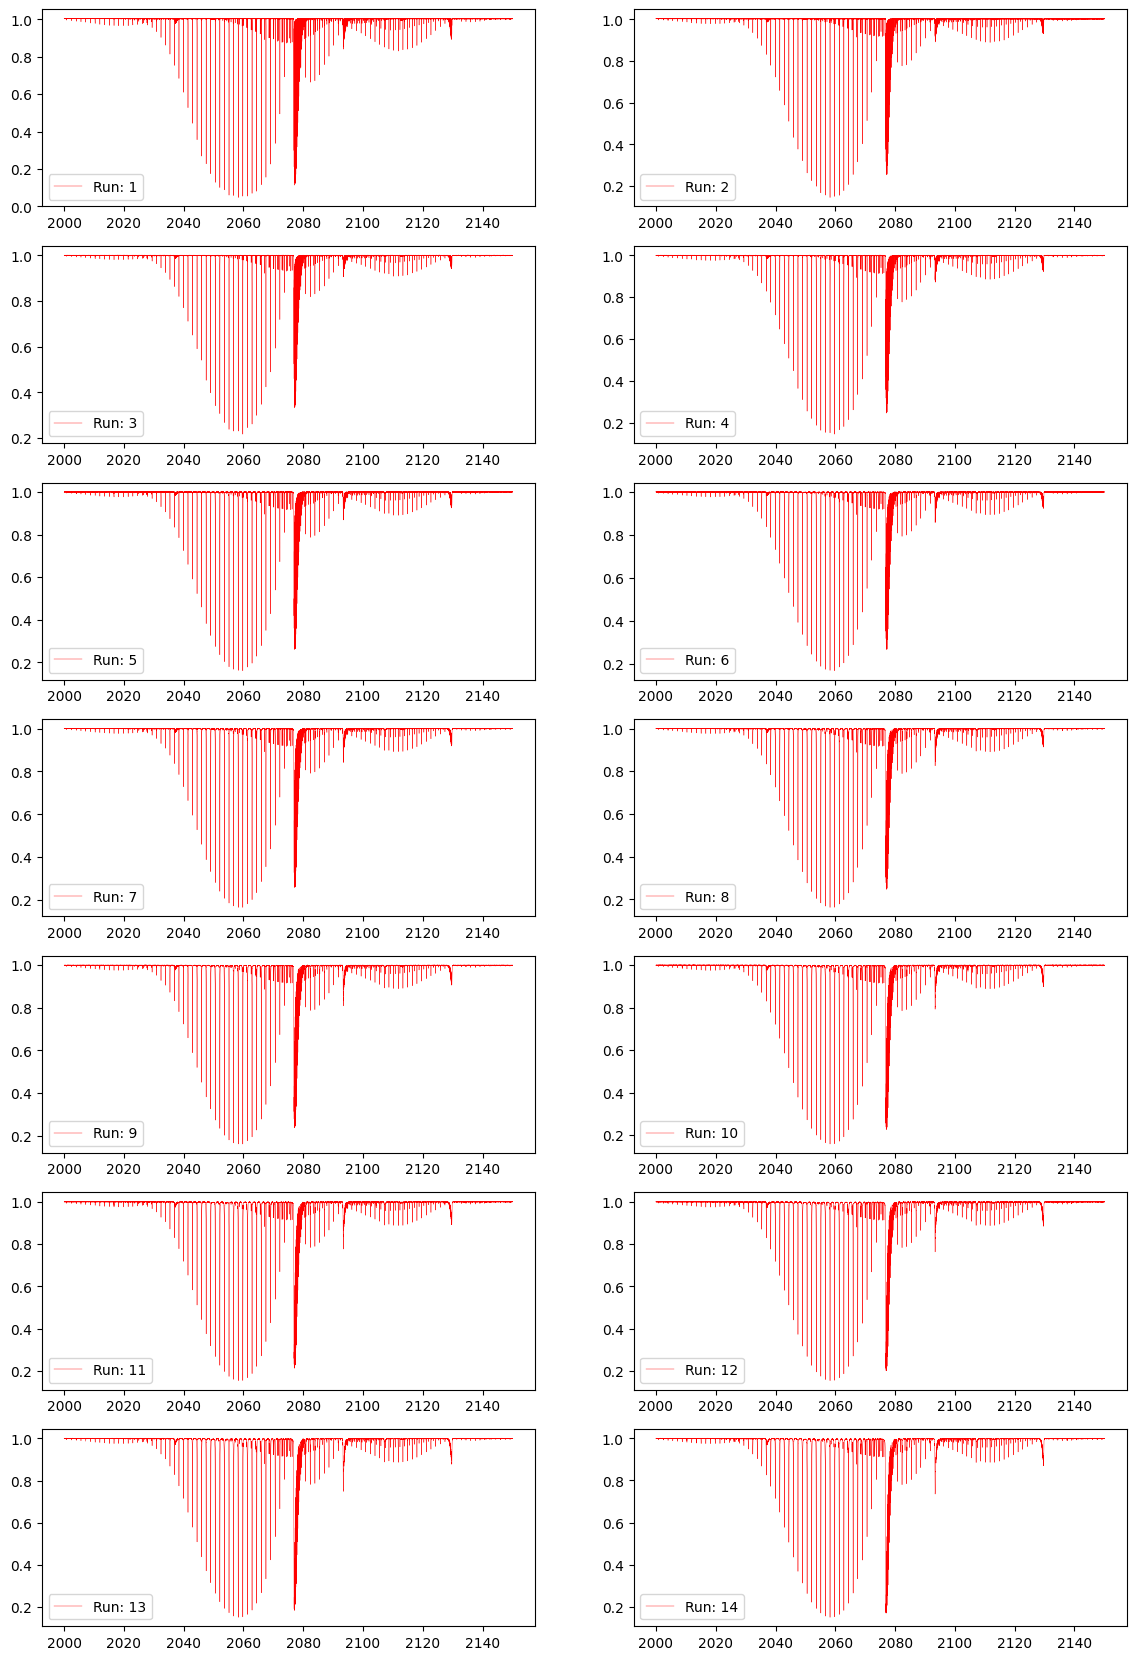

In [13]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 21))
axes = axes.flatten()
for i in range(14):
    df = dfl[-i-1]
    axes[i].plot(df[r'Wavenumber ($cm^{-1}$)'], df['Transmittance_noisy'], linewidth = 0.3, label= f'Run: {i+1}', color = 'r')    
    axes[i].legend()

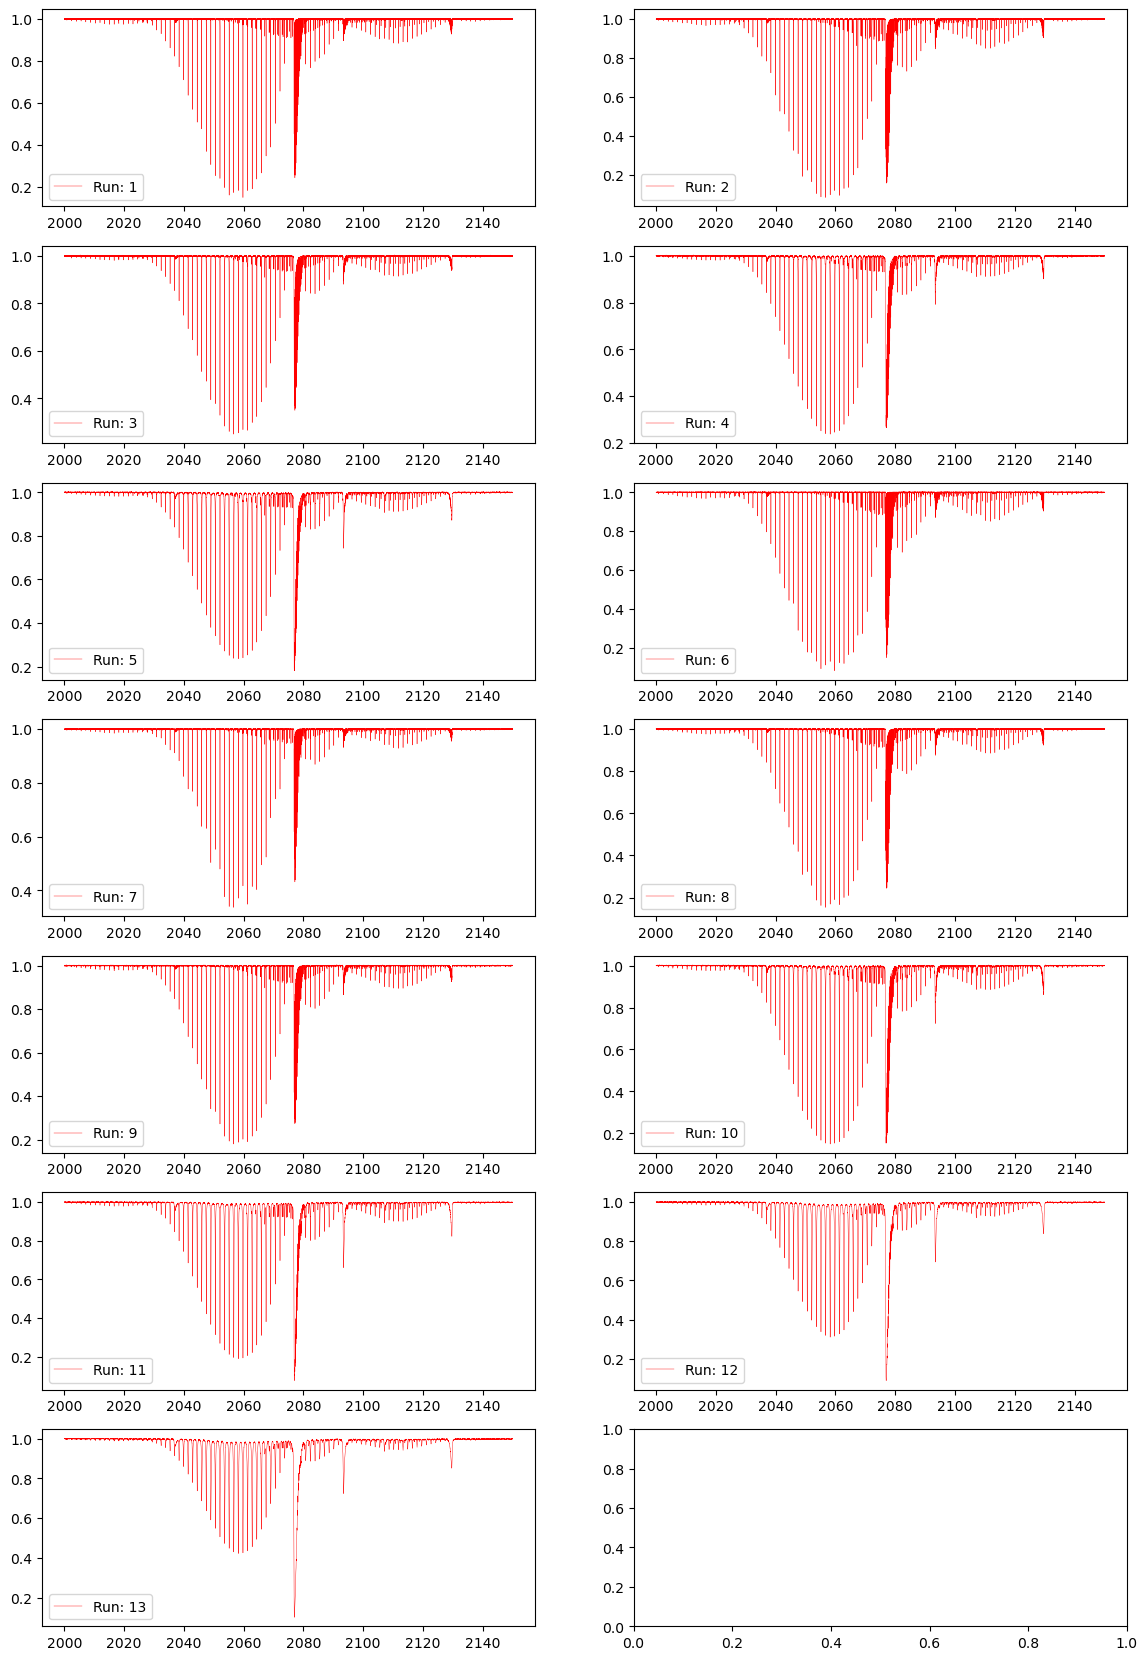

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 21))
axes = axes.flatten()
for i in range(13):
    df = labfit[i]
    axes[i].plot(df[r'Wavenumber ($cm^{-1}$)'], df['Transmittance_noisy'], linewidth = 0.3, label= f'Run: {i+1}', color = 'r')    
    axes[i].legend()
plt.savefig('labfit_output_ils/labfit_ils_noisy.png')

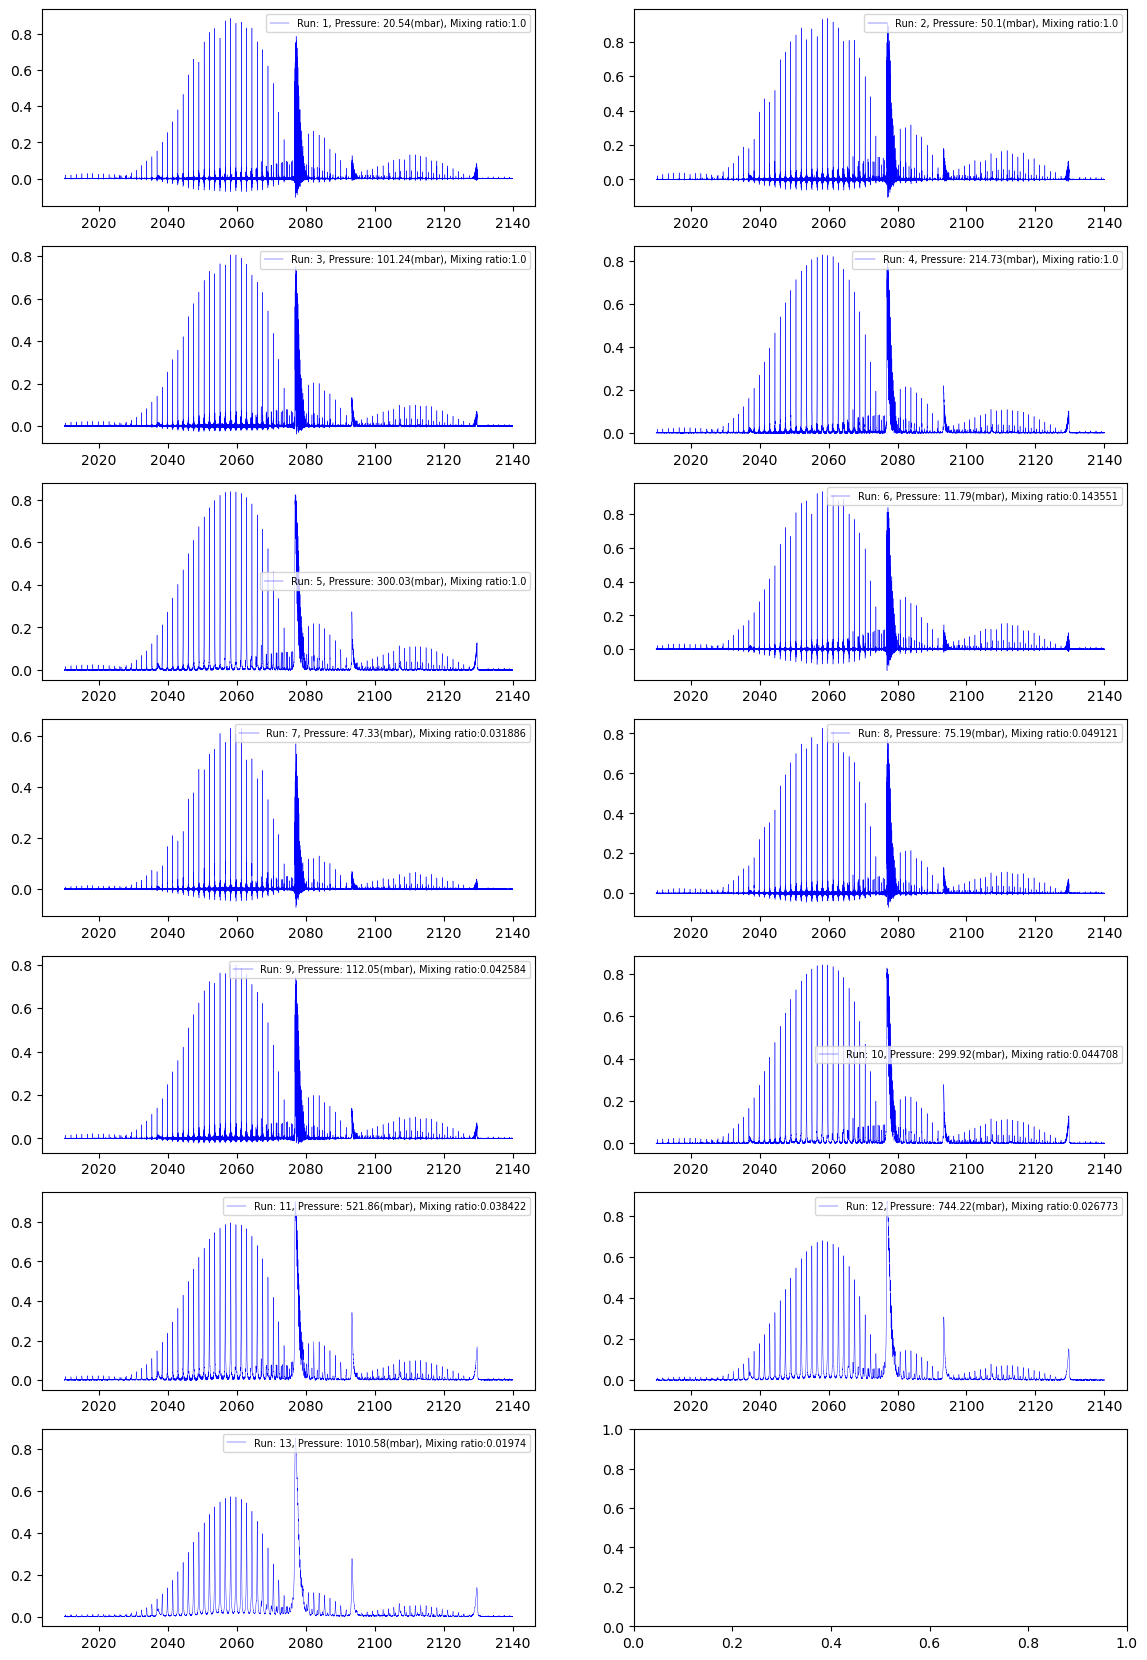

In [35]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 21))
axes = axes.flatten()
for i in range(13):
    df = spec_data[i]
    pressure = sdf.loc[i, 'Total calibrated pressure (mbar)']
    ratio = sdf.loc[i, 'Mixing ratio of CO2']
    axes[i].plot(df['nu_ins'], df['absorp_noisy'], linewidth = 0.3, label= f'Run: {i+1}, Pressure: {pressure}(mbar), Mixing ratio:{ratio}', color = 'b')    
    axes[i].legend(fontsize=7)
#plt.savefig('ht_hapi.png')

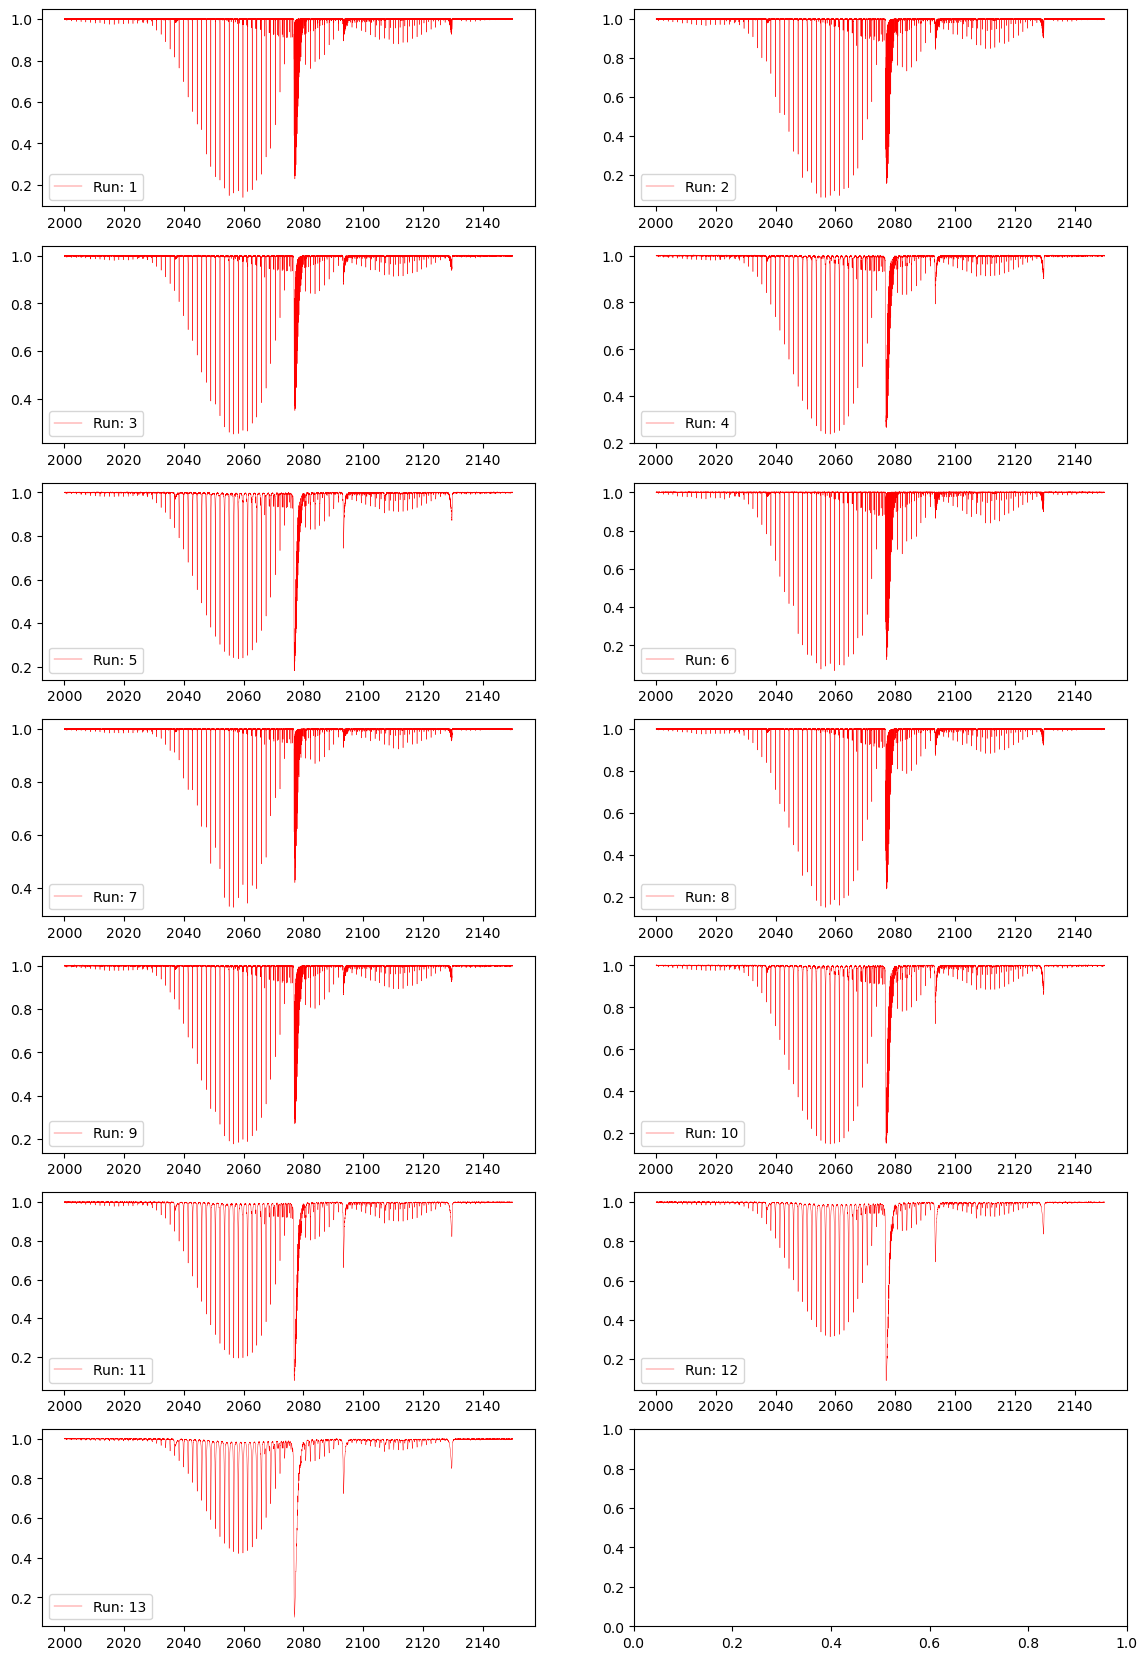

In [147]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 21))
axes = axes.flatten()
for i in range(13):
    df = labfit[i]
    axes[i].plot(df[r'Wavenumber ($cm^{-1}$)'], df['Transmittance_noisy'], linewidth = 0.3, label= f'Run: {i+1}', color = 'r')    
    axes[i].legend()
#plt.savefig('labfit_noisy.png')

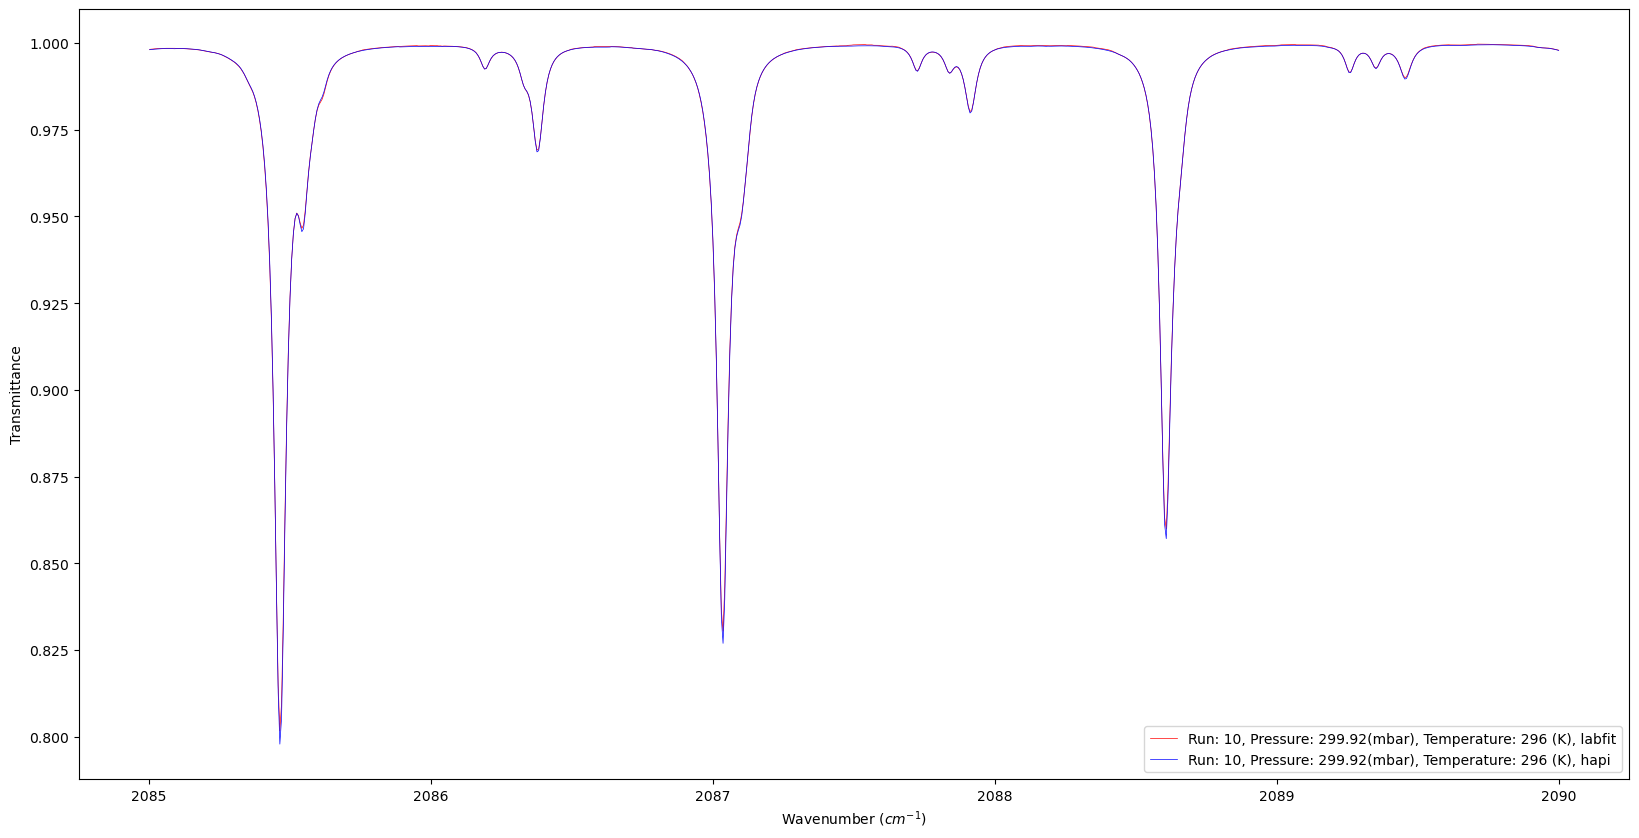

In [161]:
plot_spec(run_num, nu_min = 2085, nu_max = 2090, color = 'r', data = 'labfit', yaxis = 'Transmittance')
plot_spec(run_num, nu_min = 2085, nu_max = 2090, color = 'b', yaxis = 'Transmittance')